In [1]:
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
def construct_A(X):
    A=[]
    for i in range(X.shape[1]):
        row = []
        for j in range(X.shape[1]):
            s = 0
            for d in X:
                s += d[i]*d[j]
            row.append(s)
        A.append(row)
    return np.matrix(A)

In [3]:
def construct_b(X, r):
    b=[np.dot(X[:, i], r) for i in range(X.shape[1])]
    return np.matrix(b)

# A Simple Line - No Noise

In [4]:
def f(x):
    return 1 + 2*x

In [5]:
rg = np.random.RandomState(0)

In [6]:
rg.permutation(range(10))

array([2, 8, 4, 9, 1, 6, 7, 3, 0, 5])

In [7]:
x_all = np.linspace(-2, 2, 100)

x_tr = x_all[25:75]
x_tr = x_tr[rg.permutation(range(len(x_tr)))[:10]]
r_tr = f(x_tr)
r_all = f(x_all)

D_tr = x_tr[:, np.newaxis]
X_tr=np.hstack((np.ones((D_tr.shape[0],1)),D_tr))

D_all = x_all[:, np.newaxis]
X_all=np.hstack((np.ones((D_all.shape[0],1)),D_all))

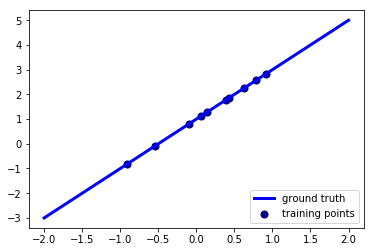

In [8]:
lw=3
plt.plot(x_all, f(x_all), color='blue', linewidth=lw, label="ground truth")
plt.scatter(x_tr, r_tr, color='navy', s=50, marker='o', label="training points")
plt.legend(loc='lower right')

In [9]:
A=construct_A(X_tr)
b=construct_b(X_tr, r_tr)

In [10]:
A.I*b.T

matrix([[1.],
        [2.]])

In [11]:
clf = LinearRegression(fit_intercept=False)
clf.fit(X_tr, r_tr)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [12]:
clf.coef_

array([1., 2.])

In [13]:
clf.intercept_

0.0

In [14]:
np.linalg.lstsq(X_tr, r_tr)

c:\users\mbilg\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([1., 2.]), array([5.66308587e-31]), 2, array([3.2317068 , 1.69724184]))

# A Simple Line - With Noise

In [15]:
r_noisy = r_tr+rg.normal(loc=0, scale=0.5, size=len(r_tr))

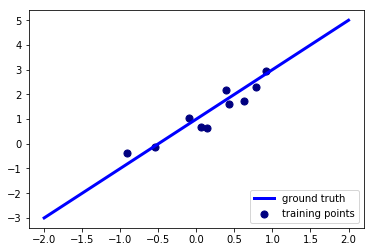

In [16]:
lw=3
plt.plot(x_all, f(x_all), color='blue', linewidth=lw, label="ground truth")
plt.scatter(x_tr, r_noisy, color='navy', s=50, marker='o', label="training points")
plt.legend(loc='lower right')

In [17]:
A=construct_A(X_tr)
b=construct_b(X_tr, r_noisy)

In [18]:
w_noisy = np.squeeze(np.asarray(A.I*b.T))

In [19]:
w_noisy

array([0.94792687, 1.75900437])

In [20]:
p = np.dot(X_all, w_noisy)

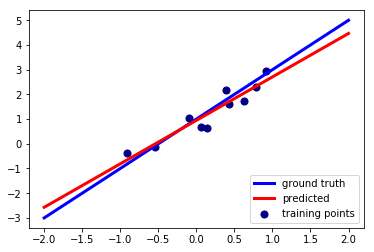

In [21]:
lw=3
plt.plot(x_all, f(x_all), color='blue', linewidth=lw, label="ground truth")
plt.scatter(x_tr, r_noisy, color='navy', s=50, marker='o', label="training points")
plt.plot(x_all, p, color='red', linewidth=lw, label='predicted')
plt.legend(loc='lower right')

In [22]:
clf = LinearRegression(fit_intercept=False)
clf.fit(X_tr, r_noisy)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [23]:
clf.coef_

array([0.94792687, 1.75900437])

In [24]:
w_noisy

array([0.94792687, 1.75900437])

# X^3 - No Noise

In [25]:
def f(x):
    return (x**3)-12*(x**2)+36*x

In [26]:
x_all = np.linspace(0, 8, 100)

x_tr = x_all[25:75]
x_tr = x_tr[rg.permutation(range(len(x_tr)))[:10]]
r_tr = f(x_tr)
r_all = f(x_all)

D_tr = x_tr[:, np.newaxis]
X_tr=np.hstack((np.ones((D_tr.shape[0],1)),D_tr))

D_all = x_all[:, np.newaxis]
X_all=np.hstack((np.ones((D_all.shape[0],1)),D_all))

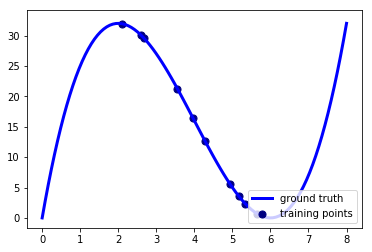

In [27]:
lw=3
plt.plot(x_all, f(x_all), color='blue', linewidth=lw, label="ground truth")
plt.scatter(x_tr, r_tr, color='navy', s=50, marker='o', label="training points")
plt.legend(loc='lower right')

In [28]:
A=construct_A(X_tr)
b=construct_b(X_tr, r_tr)

In [29]:
w = np.squeeze(np.asarray(A.I*b.T))

In [30]:
p = np.dot(X_all, w)

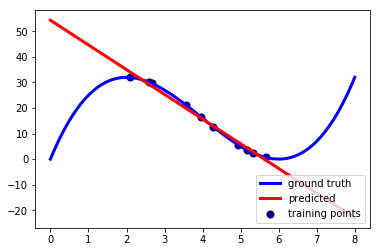

In [31]:
lw=3
plt.plot(x_all, f(x_all), color='blue', linewidth=lw, label="ground truth")
plt.scatter(x_tr, r_tr, color='navy', s=50, marker='o', label="training points")
plt.plot(x_all, p, color='red', linewidth=lw, label='predicted')
plt.legend(loc='lower right')

In [32]:
pf = PolynomialFeatures(degree=3)
X_tr=pf.fit_transform(D_tr)
A=construct_A(X_tr)
b=construct_b(X_tr, r_tr)
w = np.squeeze(np.asarray(A.I*b.T))
X_all=pf.transform(D_all)
p = np.dot(X_all, w)

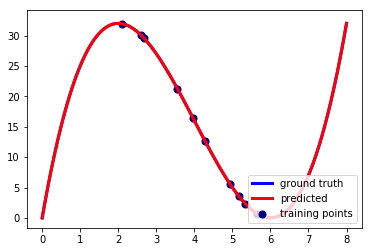

In [33]:
lw=3
plt.plot(x_all, f(x_all), color='blue', linewidth=lw, label="ground truth")
plt.scatter(x_tr, r_tr, color='navy', s=50, marker='o', label="training points")
plt.plot(x_all, p, color='red', linewidth=lw, label='predicted')
plt.legend(loc='lower right')

In [34]:
r_noisy = r_tr+rg.normal(loc=0, scale=2, size=len(r_tr))

In [35]:
A=construct_A(X_tr)
b=construct_b(X_tr, r_noisy)
w = np.squeeze(np.asarray(A.I*b.T))
p = np.dot(X_all, w)

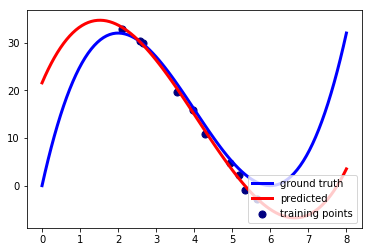

In [36]:
lw=3
plt.plot(x_all, f(x_all), color='blue', linewidth=lw, label="ground truth")
plt.scatter(x_tr, r_noisy, color='navy', s=50, marker='o', label="training points")
plt.plot(x_all, p, color='red', linewidth=lw, label='predicted')
plt.legend(loc='lower right')

# L2 Regularization

In [37]:
r_noisy = r_tr+rg.normal(loc=0, scale=1, size=len(r_tr))
pf = PolynomialFeatures(degree=5)
X_tr=pf.fit_transform(D_tr)
A=construct_A(X_tr)
b=construct_b(X_tr, r_noisy)
w=np.squeeze(np.asarray(A.I*b.T))

In [38]:
w

array([ 233.38213184, -321.58669813,  197.56732735,  -57.83457179,
          7.95067998,   -0.41593575])

In [39]:
B=A+10*np.eye(A.shape[0])
w_r = np.squeeze(np.asarray(B.I*b.T))

In [40]:
w_r

array([ 1.15523206,  2.02043324,  2.87808031,  2.39367111, -1.24952621,
        0.12837265])

In [41]:
clf=Ridge(alpha=10, fit_intercept=False)
clf.fit(X_tr, r_noisy)
clf.coef_

array([ 1.15523206,  2.02043324,  2.87808031,  2.39367111, -1.24952621,
        0.12837265])